<a href="https://colab.research.google.com/github/gaurav540/Grocery_Exploratory_Data_Analysis_and_Clustering/blob/main/Grocery_Exploratory_Data_Analysis_and_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Grocery Sales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/Supermart Grocery Sales - Retail Analytics Dataset (1).csv")

In [ ]:
data.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


# Null Values & Duplicate Values

In [ ]:
data.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


No null values present in the dataset

In [ ]:
data.duplicated().any()

False

No duplicate values present in the dataset

In [ ]:
data['order_date_1'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y', errors='coerce')
data['order_date_2'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y', errors='coerce')

# Combine results, prioritize the first format
data['Order Date'] = data['order_date_1'].combine_first(data['order_date_2'])

# Drop intermediate columns
data.drop(columns=['order_date_1', 'order_date_2'], inplace=True)

# Total Sales by region

In [ ]:
region = pd.pivot_table(data=data, index='Region', values=['Order ID', 'Sales'],
               aggfunc = {'Order ID':'count', 'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
region

,Region,Order ID,Sales
4,West,3203,4798743
1,East,2848,4248368
0,Central,2323,3468156
3,South,1619,2440461
2,North,1,1254


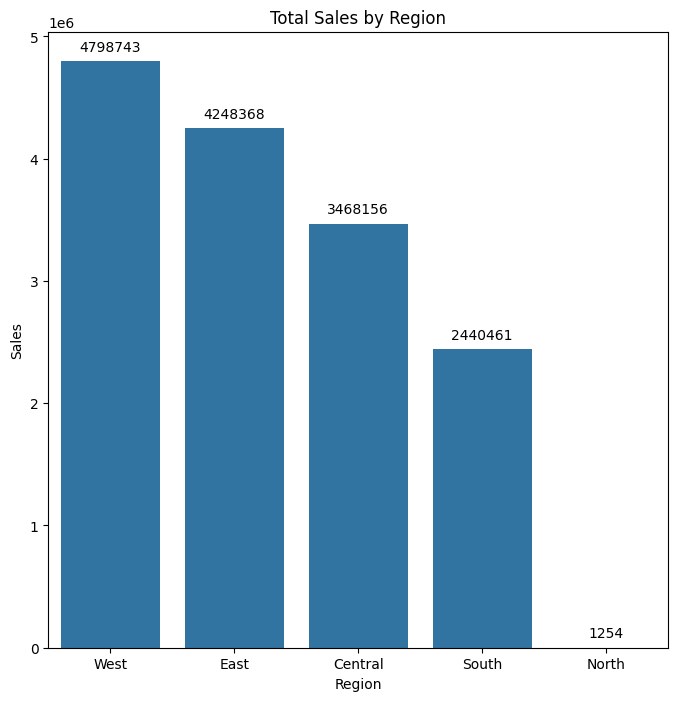

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust width and height as needed

# Create the vertical bar plot
sns.barplot(x='Region', y='Sales', data=region, ax=ax)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5, fontsize=10, fmt="%d")

# Customize the plot
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')

# Show the plot
plt.show()

# Total Orders by Region

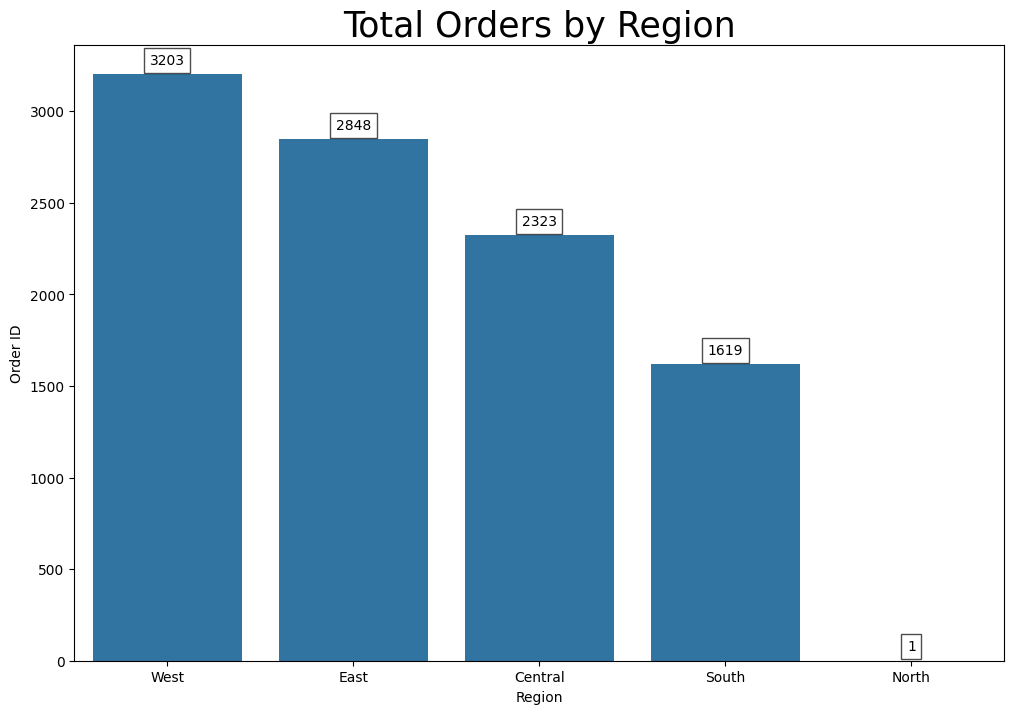

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height as needed

# Create the vertical bar plot with Order ID on the y-axis and Region on the x-axis
sns.barplot(x='Region', y='Order ID', data=region, ax=ax)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Customize the plot
plt.title('Total Orders by Region', fontsize=25)
plt.xlabel('Region')
plt.ylabel('Order ID')

# Show the plot
plt.show()

In [ ]:
data.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu


# Total Sales by Category and Sub Category

In [ ]:
category_sales = pd.pivot_table(data=data,index=['Category','Sub Category'],values='Sales',
                                aggfunc='sum').reset_index().sort_values(['Category','Sales'],ascending=False)

In [ ]:
category_sales

,Category,Sub Category,Sales
21,Snacks,Cookies,768213
22,Snacks,Noodles,735435
20,Snacks,Chocolates,733898
18,Oil & Masala,Masalas,697480
19,Oil & Masala,Spices,672876
17,Oil & Masala,Edible Oil & Ghee,668086
13,Fruits & Veggies,Fresh Fruits,551212
14,Fruits & Veggies,Fresh Vegetables,525842
16,Fruits & Veggies,Organic Vegetables,520271
15,Fruits & Veggies,Organic Fruits,503402


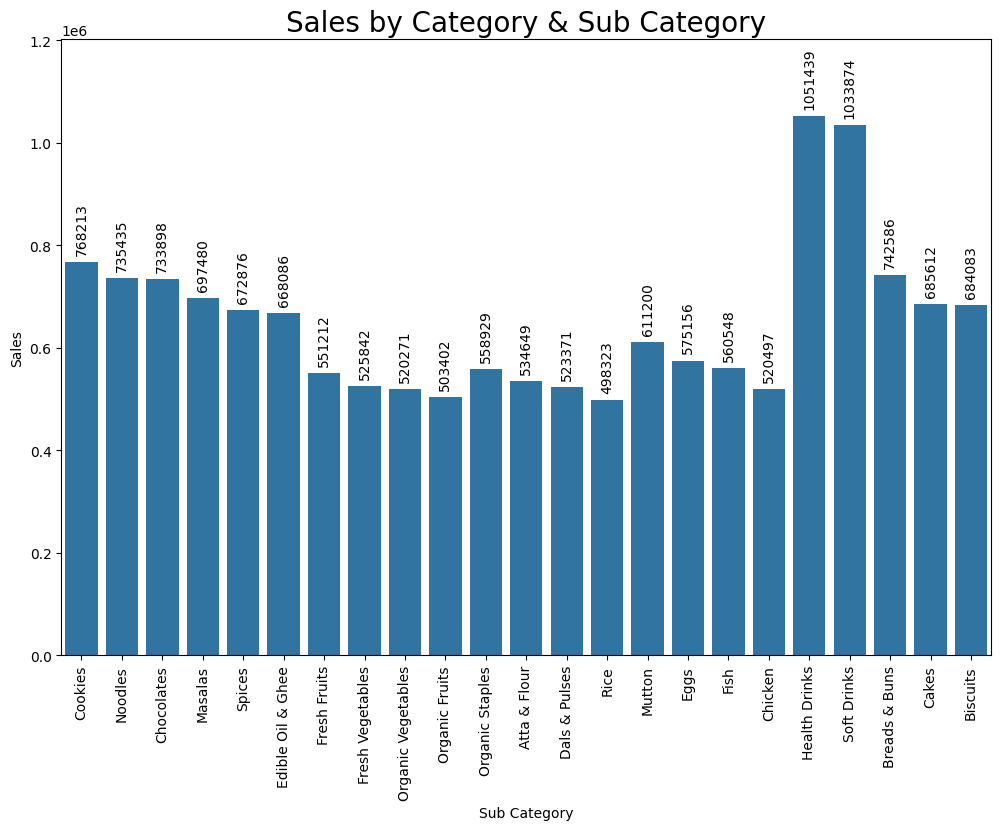

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))  # Adjust width and height as needed
sns.barplot(x='Sub Category', y='Sales', data=category_sales, ax=ax)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5, fontsize=10, fmt='%d', rotation=90)

# Customize the plot
plt.title('Sales by Category & Sub Category', fontsize=20)
plt.xlabel('Sub Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
max_sales = category_sales['Sales'].max()
plt.ylim(0, max_sales + 150000)
# Show the plot
plt.show()

# Profit margin by sub category

In [ ]:
data.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [ ]:
prof_margin = pd.pivot_table(data=data,index='Sub Category',values=['Sales','Profit'],aggfunc='sum').reset_index()
prof_margin['Profit Margin'] = round(prof_margin['Profit']/prof_margin['Sales']*100,2)
prof_margin.sort_values(by='Profit Margin',ascending=False,inplace=True)
prof_margin

,Sub Category,Profit,Sales,Profit Margin
16,Noodles,193685.81,735435,26.34
10,Fish,147248.01,560548,26.27
17,Organic Fruits,130862.33,503402,26.00
18,Organic Staples,144136.89,558929,25.79
2,Breads & Buns,190764.98,742586,25.69
19,Organic Vegetables,133596.37,520271,25.68
20,Rice,126932.36,498323,25.47
13,Health Drinks,267469.79,1051439,25.44
8,Edible Oil & Ghee,168593.58,668086,25.24
9,Eggs,144669.92,575156,25.15


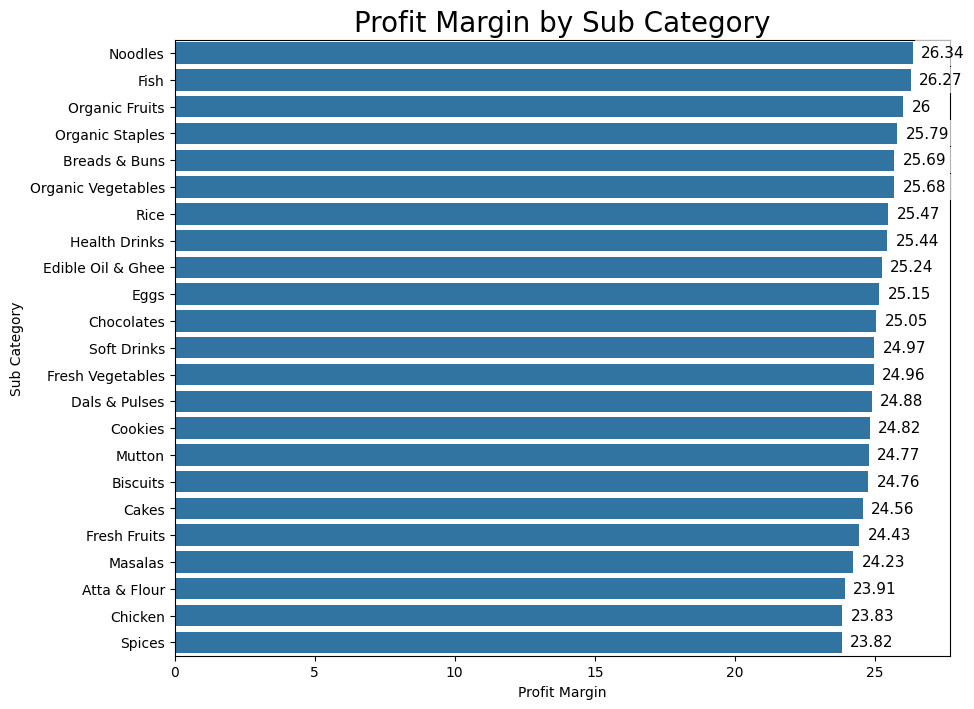

In [ ]:
bbox_args = dict(facecolor='white', alpha=0.7, edgecolor='none')

plt.rcParams['figure.figsize'] = (10, 8)

fig, ax = plt.subplots()
sns.barplot(x='Profit Margin', y='Sub Category', data=prof_margin, ax=ax)

for container in ax.containers:
    ax.bar_label(container, padding=6, fontsize=11, bbox=bbox_args)

plt.title('Profit Margin by Sub Category', fontsize=20)
plt.xlabel('Profit Margin')
plt.ylabel('Sub Category')

plt.show()


# Total Sales & Orders by Year

In [ ]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
data['Year'] = data['Order Date'].dt.year

In [ ]:
year_performance = pd.pivot_table(data=data, index='Year', values=['Order ID', 'Sales', 'Profit'],
               aggfunc={'Order ID':'count', 'Sales':'sum', 'Profit':'sum'}).reset_index()
year_performance

,Year,Order ID,Profit,Sales
0,2015,1993,752529.11,2975599
1,2016,2102,797192.99,3131959
2,2017,2587,953216.22,3871912
3,2018,3312,1244182.88,4977512


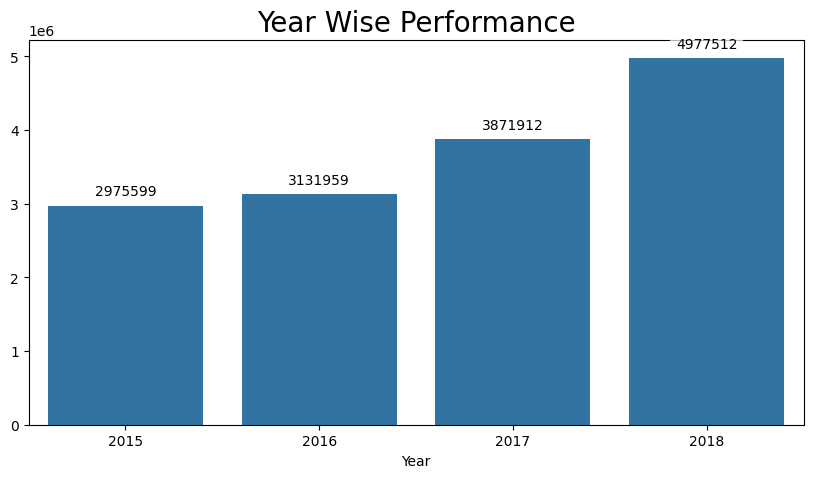

In [ ]:
# Resizing the figure
plt.rcParams['figure.figsize'] = (10,5)
ax = sns.barplot(x='Year',y='Sales',data=year_performance,)
for i in ax.containers:
    ax.bar_label(i,padding=5,fontsize=10,bbox=bbox_args,fmt = '%d')
plt.ylabel(None)
plt.title('Year Wise Performance',fontsize=20)
plt.show()


In [ ]:
data.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,2016


# Total Sales by Cities

In [ ]:
city_sales = pd.pivot_table(data=data, index=['City','Year'], values=['Sales', 'Profit'],
               aggfunc={'Sales':'sum', 'Profit':'sum'}).reset_index()
city_sales = city_sales.sort_values(by='Sales',ascending=False)
city_sales

,City,Year,Profit,Sales
27,Kanyakumari,2018,61504.79,263243
11,Coimbatore,2018,59836.89,232831
71,Tenkasi,2018,57448.63,232412
3,Bodi,2018,58880.87,230626
63,Ramanadhapuram,2018,52641.46,227804
...,...,...,...,...
45,Namakkal,2016,24780.63,105114
80,Trichy,2015,25489.56,103001
60,Ramanadhapuram,2015,27478.04,102407
36,Madurai,2015,25403.58,98886


Text(0, 0.5, '')

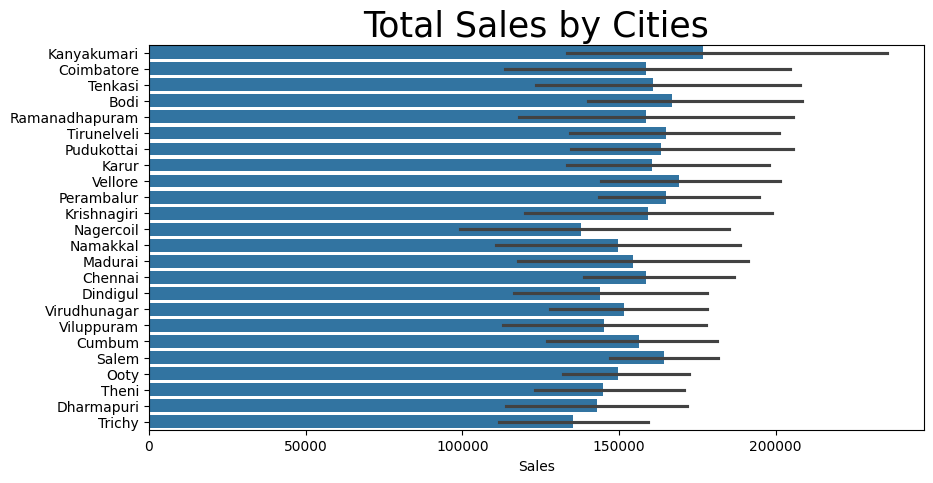

In [ ]:
sns.barplot(x='Sales',y='City',data=city_sales)
for i in ax.containers:
    ax.bar_label(i,label_type='edge',padding=7,bbox=bbox_args)
plt.title('Total Sales by Cities',fontsize=25)
plt.ylabel(None)

# Obeservations / Insights

From the above visulaisations, here are some various insights:
- The most sales & orders was from the West region
- The highest sales by category & sub-category comes from Health Drinks
- The lowest sales by category & sub-category comes from Dals & Pulses
- The sub-category with the highest profit margin is Noodles with a profit margin of 26.34%
- The sub-category with the lowest profit margin is Spices with a profit margin of 23.82%
- The city 'Kanyakumari' has the most number of sales in overall years
- The city 'Nagercoil' has the least number of sales in overall years


In [ ]:
data.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,2016


#  Top 10 Customers with the most number of orders

In [ ]:
customers = data['Customer Name'].value_counts().head(100)

In [ ]:
customers.values

array([227, 224, 218, 218, 215, 215, 212, 209, 208, 208, 207, 206, 205,
       205, 205, 204, 204, 204, 203, 203, 203, 202, 202, 201, 201, 201,
       200, 200, 198, 198, 197, 197, 196, 196, 195, 195, 195, 193, 189,
       189, 188, 188, 188, 187, 187, 186, 185, 182, 181, 174])

# Category with Top 3 position in sales (overall years)

In [ ]:
top3_sales = pd.pivot_table(data=data, index='Category', columns='Year', values='Sales', aggfunc='sum').reset_index()

# Add ranking columns for each year
top3_sales['2015_Rank'] = top3_sales[2015].rank(method='max', ascending=False)
top3_sales['2016_Rank'] = top3_sales[2016].rank(method='max', ascending=False)
top3_sales['2017_Rank'] = top3_sales[2017].rank(method='max', ascending=False)
top3_sales['2018_Rank'] = top3_sales[2018].rank(method='max', ascending=False)
top3_sales

Year,Category,2015,2016,2017,2018,2015_Rank,2016_Rank,2017_Rank,2018_Rank
0,Bakery,433979,487965,504263,686074,3.0,1.0,7.0,6.0
1,Beverages,409091,425719,543575,706928,6.0,6.0,5.0,4.0
2,"Eggs, Meat & Fish",482982,462055,565101,757263,1.0,3.0,3.0,2.0
3,Food Grains,356704,438736,609338,710494,7.0,4.0,1.0,3.0
4,Fruits & Veggies,409212,468441,516400,706674,5.0,2.0,6.0,5.0
5,Oil & Masala,423918,412725,564196,637603,4.0,7.0,4.0,7.0
6,Snacks,459713,436318,569039,772476,2.0,5.0,2.0,1.0


In [ ]:
top3_sales[(top3_sales['2015_Rank'] <=3) & (top3_sales['2016_Rank'] <=3) & (top3_sales['2017_Rank'] <=3) & (top3_sales['2018_Rank'] <=3)]


Year,Category,2015,2016,2017,2018,2015_Rank,2016_Rank,2017_Rank,2018_Rank
2,"Eggs, Meat & Fish",482982,462055,565101,757263,1.0,3.0,3.0,2.0


Eggs, Meat & Fish Category is consistent in the sales across years.

In [ ]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,2016


In [ ]:
data['Month'] = data['Order Date'].dt.month

In [ ]:
data.head(20)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,2017,8
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,2017,8
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,2017,12
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,2016,11
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,2016,11
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-09-06,West,2305,0.26,322.70,Tamil Nadu,2015,9
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,2015-09-06,West,826,0.33,346.92,Tamil Nadu,2015,9
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,2015-09-06,West,1847,0.32,147.76,Tamil Nadu,2015,9
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-09-06,West,791,0.23,181.93,Tamil Nadu,2015,9
9,OD10,Krithika,Bakery,Cakes,Chennai,2015-09-06,West,1795,0.27,484.65,Tamil Nadu,2015,9


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
le = LabelEncoder()

In [ ]:
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Month'] = le.fit_transform(data['Month'])

In [ ]:
data.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month
0,OD1,Harish,5,14,21,2017-08-11,2,1254,0.12,401.28,0,2017,7
1,OD2,Sudha,1,13,8,2017-08-11,3,749,0.18,149.80,0,2017,7
2,OD3,Hussain,3,0,13,2017-12-06,4,2360,0.21,165.20,0,2017,11
3,OD4,Jackson,4,12,4,2016-11-10,3,896,0.25,89.60,0,2016,10
4,OD5,Ridhesh,3,18,12,2016-11-10,3,2355,0.26,918.45,0,2016,10
5,OD6,Adavan,3,18,4,2015-09-06,4,2305,0.26,322.70,0,2015,8
6,OD7,Jonas,4,12,20,2015-09-06,4,826,0.33,346.92,0,2015,8
7,OD8,Hafiz,4,11,15,2015-09-06,4,1847,0.32,147.76,0,2015,8
8,OD9,Hafiz,0,1,19,2015-09-06,4,791,0.23,181.93,0,2015,8
9,OD10,Krithika,0,3,1,2015-09-06,4,1795,0.27,484.65,0,2015,8


In [ ]:
# data.drop(columns=['State'], inplace=True)

In [ ]:
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales','State'])
target = data['Sales']

In [ ]:
features

,Category,Sub Category,City,Region,Discount,Profit,Year,Month
0,5,14,21,2,0.12,401.28,2017,7
1,1,13,8,3,0.18,149.80,2017,7
2,3,0,13,4,0.21,165.20,2017,11
3,4,12,4,3,0.25,89.60,2016,10
4,3,18,12,3,0.26,918.45,2016,10
...,...,...,...,...,...,...,...,...
9989,2,9,9,4,0.16,359.10,2015,11
9990,0,1,6,4,0.26,71.70,2015,11
9991,3,20,0,4,0.16,501.44,2017,5
9992,5,22,14,4,0.15,597.24,2018,9


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the model
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[1141.96526201 1525.53757704 1132.12251211 ... 1713.34580959 1175.27731825
 1025.51042588]


In [ ]:
#MSE and R-squared

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 213058.76975418377
R-squared: 0.35400836259872004


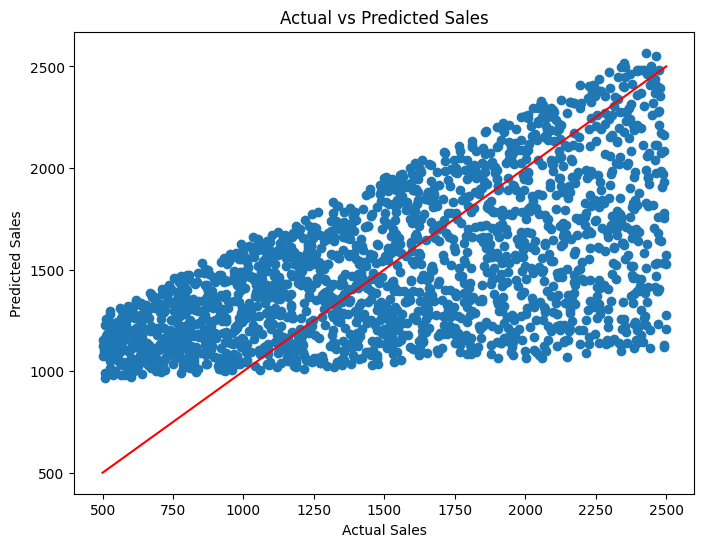

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# Clustering part

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset (1).csv')


df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

numeric_aggregates = df.groupby('Customer Name').agg({
    'Sales': 'sum',
    'Discount': 'mean',
    'Order ID': 'count'
}).reset_index()

numeric_aggregates.rename(columns={'Order ID': 'Number of Transactions'}, inplace=True)

print("Aggregated Data:")
print(numeric_aggregates)


Aggregated Data:
   Customer Name   Sales  Discount  Number of Transactions
0         Adavan  315341  0.224098                     205
1          Aditi  299674  0.223904                     187
2          Akash  307488  0.225561                     196
3           Alan  294397  0.229192                     198
4         Amrish  333351  0.226300                     227
5            Amy  301558  0.230408                     196
6            Anu  283735  0.221129                     186
7         Arutra  325720  0.222156                     218
8         Arvind  293802  0.222956                     203
9         Esther  283656  0.232169                     189
10        Ganesh  278349  0.226839                     193
11         Hafiz  251965  0.236264                     174
12        Harish  293839  0.223269                     208
13       Haseena  298924  0.227624                     202
14       Hussain  307337  0.231923                     208
15       Jackson  271793  0.218736     

   Customer Name  Cluster
0         Adavan        2
1          Aditi        1
2          Akash        1
3           Alan        1
4         Amrish        2
5            Amy        1
6            Anu        4
7         Arutra        2
8         Arvind        1
9         Esther        4
10        Ganesh        4
11         Hafiz        4
12        Harish        1
13       Haseena        1
14       Hussain        3
15       Jackson        4
16         James        1
17         Jonas        0
18         Komal        0
19      Krithika        2
20         Kumar        4
21         Malik        1
22        Mathew        3
23        Muneer        3
24          Peer        0
25           Ram        1
26        Ramesh        4
27          Ravi        1
28       Ridhesh        0
29        Roshan        1
30       Rumaiza        1
31       Sabeela        4
32          Shah        3
33        Sharon        1
34        Sheeba        3
35         Shree        1
36        Sudeep        3
37         S

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


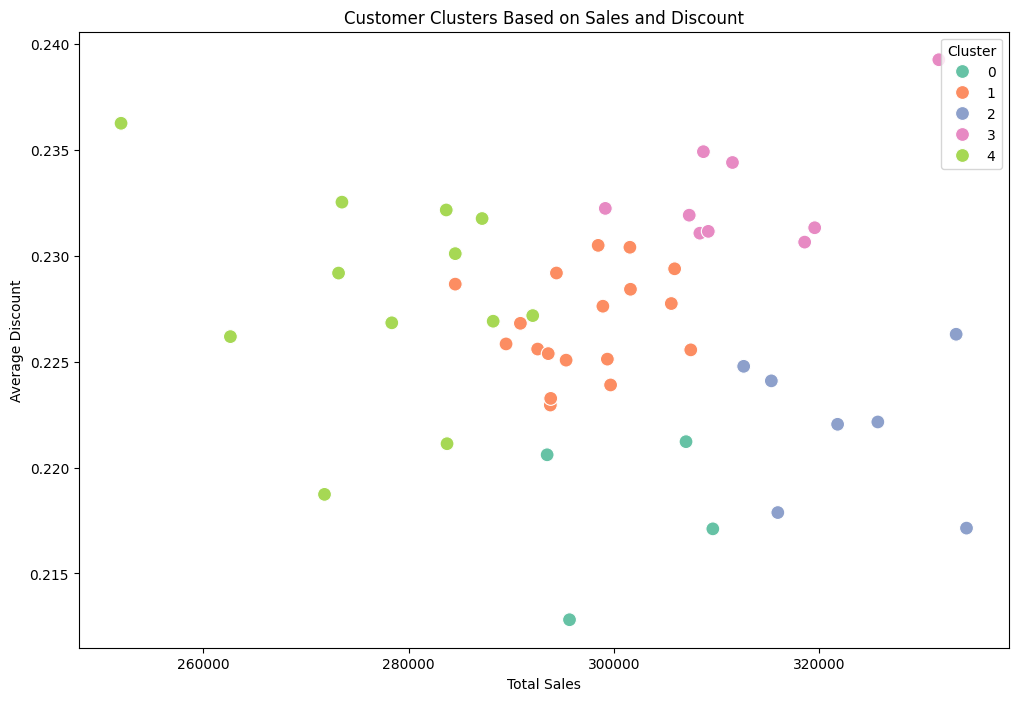

In [ ]:
df = pd.DataFrame(numeric_aggregates)

# Standardize the features
scaler = StandardScaler()
features = df.drop('Customer Name', axis=1)
customer_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(customer_scaled)

# Print cluster assignments
print(df[['Customer Name', 'Cluster']])

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Sales'], y=df['Discount'], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Customer Clusters Based on Sales and Discount')
plt.xlabel('Total Sales')
plt.ylabel('Average Discount')
plt.legend(title='Cluster')
plt.show()

- **Cluster 0:**
  - Typical Sales: Above average
  - Typical Discount: Slightly higher
  - Typical Transactions: Above average

- **Cluster 1:**
  - Typical Sales: Average
  - Typical Discount: Average
  - Typical Transactions: Average

- **Cluster 2:**
  - Typical Sales: Higher
  - Typical Discount: Slightly lower
  - Typical Transactions: Slightly lower

- **Cluster 3:**
  - Typical Sales: Lower
  - Typical Discount: Higher
  - Typical Transactions: Average

- **Cluster 4:**
  - Typical Sales: Highest
  - Typical Discount: Average
  - Typical Transactions: Highest
